In [1]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydra.model import plot
import hydra.model.helper as helper

In [2]:
FAST_MOMENT = 0.25
SLOW_MOMENT = 45
DT = 0.02

In [3]:
FILENAME = "2020-06-04-15-55-05-012014"
METAPATH = "./results/data/meta.txt"

# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 400, 200)
calcium.shape

# Extract data
frame1_0005_ecto = calcium[int(FAST_MOMENT/DT), :200, :]
frame1_0005_endo = calcium[int(FAST_MOMENT/DT), 200:, :]
frame2_0005_ecto = calcium[int(SLOW_MOMENT/DT), :200, :]
frame2_0005_endo = calcium[int(SLOW_MOMENT/DT), 200:, :]
del calcium

In [4]:
FILENAME = "2020-06-04-21-55-42-087632"
METAPATH = "./results/data/meta.txt"

# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 400, 200)
calcium.shape

# Extract data
frame1_0002_ecto = calcium[int(FAST_MOMENT/DT), :200, :]
frame1_0002_endo = calcium[int(FAST_MOMENT/DT), 200:, :]
frame2_0002_ecto = calcium[int(SLOW_MOMENT/DT), :200, :]
frame2_0002_endo = calcium[int(SLOW_MOMENT/DT), 200:, :]
del calcium

In [5]:
FILENAME = "2020-06-05-02-47-52-595342"
METAPATH = "./results/data/meta.txt"

# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 400, 200)
calcium.shape

# Extract data
frame1_00002_ecto = calcium[int(FAST_MOMENT/DT), :200, :]
frame1_00002_endo = calcium[int(FAST_MOMENT/DT), 200:, :]
frame2_00002_ecto = calcium[int(SLOW_MOMENT/DT), :200, :]
frame2_00002_endo = calcium[int(SLOW_MOMENT/DT), 200:, :]
del calcium

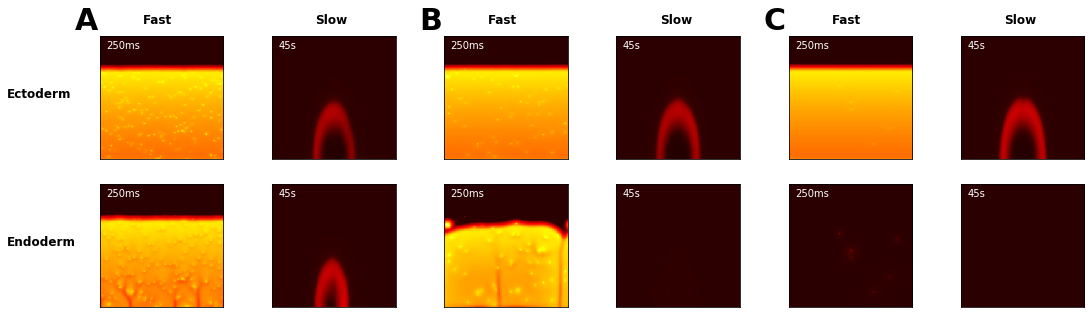

In [9]:
fig = plt.figure(figsize=(18, 5))

TEXTSIZE = 12

ax1 = fig.add_subplot(2, 6, 1)
ax1.imshow(np.flip(frame1_0005_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax1.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.text(-0.2, 1.05, 'A', size=30, weight="bold", transform=ax1.transAxes)
ax1.text(-0.75, 0.5, 'Ectoderm', size=TEXTSIZE, weight="bold", transform=ax1.transAxes)
ax1.text(0.35, 1.1, 'Fast', size=TEXTSIZE, weight="bold", transform=ax1.transAxes)

ax2 = fig.add_subplot(2, 6, 1+6)
ax2.imshow(np.flip(frame1_0005_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax2.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax2.set_xticks([])
ax2.set_yticks([])

ax1.text(-0.75, 0.5, 'Endoderm', size=TEXTSIZE, weight="bold", transform=ax2.transAxes)

ax3 = fig.add_subplot(2, 6, 2)
ax3.imshow(np.flip(frame2_0005_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax3.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.text(0.35, 1.1, 'Slow', size=TEXTSIZE, weight="bold", transform=ax3.transAxes)

ax4 = fig.add_subplot(2, 6, 2+6)
ax4.imshow(np.flip(frame2_0005_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax4.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax4.set_xticks([])
ax4.set_yticks([])

ax5 = fig.add_subplot(2, 6, 3)
ax5.imshow(np.flip(frame1_0002_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax5.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax5.set_xticks([])
ax5.set_yticks([])

ax5.text(-0.2, 1.05, 'B', size=30, weight="bold", transform=ax5.transAxes)
ax5.text(0.35, 1.1, 'Fast', size=TEXTSIZE, weight="bold", transform=ax5.transAxes)

ax6 = fig.add_subplot(2, 6, 3+6)
ax6.imshow(np.flip(frame1_0002_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax6.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax6.set_xticks([])
ax6.set_yticks([])

ax7 = fig.add_subplot(2, 6, 4)
ax7.imshow(np.flip(frame2_0002_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax7.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax7.set_xticks([])
ax7.set_yticks([])

ax7.text(0.35, 1.1, 'Slow', size=TEXTSIZE, weight="bold", transform=ax7.transAxes)

ax8 = fig.add_subplot(2, 6, 4+6)
ax8.imshow(np.flip(frame2_0002_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax8.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax8.set_xticks([])
ax8.set_yticks([])

ax9 = fig.add_subplot(2, 6, 5)
ax9.imshow(np.flip(frame1_00002_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax9.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax9.set_xticks([])
ax9.set_yticks([])

ax9.text(-0.2, 1.05, 'C', size=30, weight="bold", transform=ax9.transAxes)
ax9.text(0.35, 1.1, 'Fast', size=TEXTSIZE, weight="bold", transform=ax9.transAxes)

ax10 = fig.add_subplot(2, 6, 5+6)
ax10.imshow(np.flip(frame1_00002_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax10.text(10, 20, str(int(FAST_MOMENT*1000)) + 'ms', color='white', fontsize=10)
ax10.set_xticks([])
ax10.set_yticks([])

ax11 = fig.add_subplot(2, 6, 6)
ax11.imshow(np.flip(frame2_00002_ecto.T, 0), cmap='hot', vmin=0, vmax=1)
ax11.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax11.set_xticks([])
ax11.set_yticks([])
ax11.text(0.35, 1.1, 'Slow', size=TEXTSIZE, weight="bold", transform=ax11.transAxes)

ax12 = fig.add_subplot(2, 6, 6+6)
ax12.imshow(np.flip(frame2_00002_endo.T, 0), cmap='hot', vmin=0, vmax=1)
ax12.text(10, 20, str(int(SLOW_MOMENT)) + 's', color='white', fontsize=10)
ax12.set_xticks([])
ax12.set_yticks([])

# plt.tight_layout()
plt.savefig("./results/figures/connectivity-ratio.png", bbox_inches='tight')
plt.show()